In [1]:
! pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import yfinance as yf
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed  # Import ThreadPoolExecutor

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Step 1: Load tickers from a CSV file
tickers_df = pd.read_csv('Tickers.csv')  # Ensure this file contains updated tickers
tickers = tickers_df['Ticker'].tolist()  # Adjust based on the column name in your CSV

In [5]:
tickers

['RELIANCE.NS',
 'TCS.NS',
 'INFY.BO',
 'HDFCBANK.BO',
 'ICICIBANK.BO',
 'ADANIPOWER.BO',
 'APOLLOHOSP.BO',
 'HEROMOTOCO.BO',
 'MARUTI.BO',
 'BHARTIARTL.NS']

In [6]:
start_date = "2014-09-30"
end_date = "2024-09-30"
# Download historical data for each ticker without specifying date range
stock_data = yf.download(tickers, start=start_date, end=end_date)  # 'max' retrieves the maximum available data
stock_data = stock_data.stack(level=1).reset_index()
# Rename columns to make it more clear
stock_data.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


[*********************100%***********************]  10 of 10 completed


In [7]:
stock_data.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2014-09-30 00:00:00+00:00,ADANIPOWER.BO,43.400002,43.400002,45.200001,43.200001,44.400002,848909.0
1,2014-09-30 00:00:00+00:00,APOLLOHOSP.BO,1082.020264,1120.650024,1134.000000,1089.750000,1091.650024,14555.0
2,2014-09-30 00:00:00+00:00,BHARTIARTL.NS,346.858643,365.189453,368.569153,361.404175,363.432007,4148252.0
3,2014-09-30 00:00:00+00:00,HDFCBANK.BO,388.320587,435.750000,440.000000,431.000000,432.500000,986976.0
4,2014-09-30 00:00:00+00:00,HEROMOTOCO.BO,2133.363525,2842.050049,2920.000000,2825.300049,2865.000000,48106.0


In [8]:
stock_data['Ticker'].value_counts()

BHARTIARTL.NS    2463
RELIANCE.NS      2463
TCS.NS           2463
HDFCBANK.BO      2441
INFY.BO          2441
MARUTI.BO        2439
ADANIPOWER.BO    2438
APOLLOHOSP.BO    2438
HEROMOTOCO.BO    2438
ICICIBANK.BO     2438
Name: Ticker, dtype: int64

In [9]:
stock_data.tail()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
24457,2024-09-27 00:00:00+00:00,ICICIBANK.BO,1306.500000,1306.500000,1332.000000,1303.050049,1331.400024,218203.0
24458,2024-09-27 00:00:00+00:00,INFY.BO,1885.739136,1907.199951,1974.650024,1903.300049,1930.000000,262993.0
24459,2024-09-27 00:00:00+00:00,MARUTI.BO,13497.349609,13497.349609,13539.849609,13275.049805,13409.750000,25239.0
24460,2024-09-27 00:00:00+00:00,RELIANCE.NS,1526.175049,1526.175049,1533.474976,1492.000000,1499.000000,20597478.0
24461,2024-09-27 00:00:00+00:00,TCS.NS,4298.214355,4308.700195,4378.000000,4300.049805,4335.000000,3012477.0


In [10]:
# View dimensions of dataset   
rows, col = stock_data.shape
print ("Dimensions of dataset: {}" . format (stock_data.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (24462, 8)
Rows: 24462 
Columns: 8


In [11]:
# Dtype
print(f'The data type contains:\n object --> {stock_data.dtypes.value_counts()[1]}\n float64 --> {stock_data.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 float64 --> 6


In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24462 entries, 0 to 24461
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       24462 non-null  datetime64[ns, UTC]
 1   Ticker     24462 non-null  object             
 2   Open       24462 non-null  float64            
 3   High       24462 non-null  float64            
 4   Low        24462 non-null  float64            
 5   Close      24462 non-null  float64            
 6   Adj Close  24462 non-null  float64            
 7   Volume     24462 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), object(1)
memory usage: 1.5+ MB


In [13]:
float_cols = stock_data.columns.drop(["Ticker","Date"])
stock_data[float_cols] = stock_data[float_cols].round().astype("Int64")
stock_data.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2014-09-30 00:00:00+00:00,ADANIPOWER.BO,43,43,45,43,44,848909
1,2014-09-30 00:00:00+00:00,APOLLOHOSP.BO,1082,1121,1134,1090,1092,14555
2,2014-09-30 00:00:00+00:00,BHARTIARTL.NS,347,365,369,361,363,4148252
3,2014-09-30 00:00:00+00:00,HDFCBANK.BO,388,436,440,431,432,986976
4,2014-09-30 00:00:00+00:00,HEROMOTOCO.BO,2133,2842,2920,2825,2865,48106


In [14]:
stock_data.sort_values(by="Date").head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2014-09-30 00:00:00+00:00,ADANIPOWER.BO,43,43,45,43,44,848909
1,2014-09-30 00:00:00+00:00,APOLLOHOSP.BO,1082,1121,1134,1090,1092,14555
2,2014-09-30 00:00:00+00:00,BHARTIARTL.NS,347,365,369,361,363,4148252
3,2014-09-30 00:00:00+00:00,HDFCBANK.BO,388,436,440,431,432,986976
4,2014-09-30 00:00:00+00:00,HEROMOTOCO.BO,2133,2842,2920,2825,2865,48106


In [15]:
stock_data1 = stock_data[(stock_data['Ticker'] == 'RELIANCE.NS')]    
stock_data1.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
8,2014-09-30 00:00:00+00:00,RELIANCE.NS,195,216,217,211,212,17642155
18,2014-10-01 00:00:00+00:00,RELIANCE.NS,192,212,216,212,216,8656245
28,2014-10-07 00:00:00+00:00,RELIANCE.NS,191,212,214,211,212,12404189
38,2014-10-08 00:00:00+00:00,RELIANCE.NS,193,214,215,211,211,9827783
48,2014-10-09 00:00:00+00:00,RELIANCE.NS,197,218,219,214,214,11164671


In [16]:
# View dimensions of dataset   
rows, col = stock_data1.shape
print ("Dimensions of dataset: {}" . format (stock_data1.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (2463, 8)
Rows: 2463 
Columns: 8


In [17]:
# Dtype
print(f'The data type contains:\n object --> {stock_data1.dtypes.value_counts()[1]}\n float64 --> {stock_data1.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 float64 --> 6


In [18]:
stock_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2463 entries, 8 to 24460
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       2463 non-null   datetime64[ns, UTC]
 1   Ticker     2463 non-null   object             
 2   Open       2463 non-null   Int64              
 3   High       2463 non-null   Int64              
 4   Low        2463 non-null   Int64              
 5   Close      2463 non-null   Int64              
 6   Adj Close  2463 non-null   Int64              
 7   Volume     2463 non-null   Int64              
dtypes: Int64(6), datetime64[ns, UTC](1), object(1)
memory usage: 187.6+ KB


In [19]:
stock_data2 = stock_data1.copy()

In [20]:
# Dtype
print(f'The data type contains:\n object --> {stock_data2.dtypes.value_counts()[1]}\n int64 --> {stock_data2.dtypes.value_counts()[0]}')

The data type contains:
 object --> 1
 int64 --> 6


In [21]:
stock_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2463 entries, 8 to 24460
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       2463 non-null   datetime64[ns, UTC]
 1   Ticker     2463 non-null   object             
 2   Open       2463 non-null   Int64              
 3   High       2463 non-null   Int64              
 4   Low        2463 non-null   Int64              
 5   Close      2463 non-null   Int64              
 6   Adj Close  2463 non-null   Int64              
 7   Volume     2463 non-null   Int64              
dtypes: Int64(6), datetime64[ns, UTC](1), object(1)
memory usage: 187.6+ KB


In [22]:
stock_data2.sort_values(by="Date").head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
8,2014-09-30 00:00:00+00:00,RELIANCE.NS,195,216,217,211,212,17642155
18,2014-10-01 00:00:00+00:00,RELIANCE.NS,192,212,216,212,216,8656245
28,2014-10-07 00:00:00+00:00,RELIANCE.NS,191,212,214,211,212,12404189
38,2014-10-08 00:00:00+00:00,RELIANCE.NS,193,214,215,211,211,9827783
48,2014-10-09 00:00:00+00:00,RELIANCE.NS,197,218,219,214,214,11164671


In [23]:
# Plotting count plot by year
Year = stock_data2['Date'].dt.year

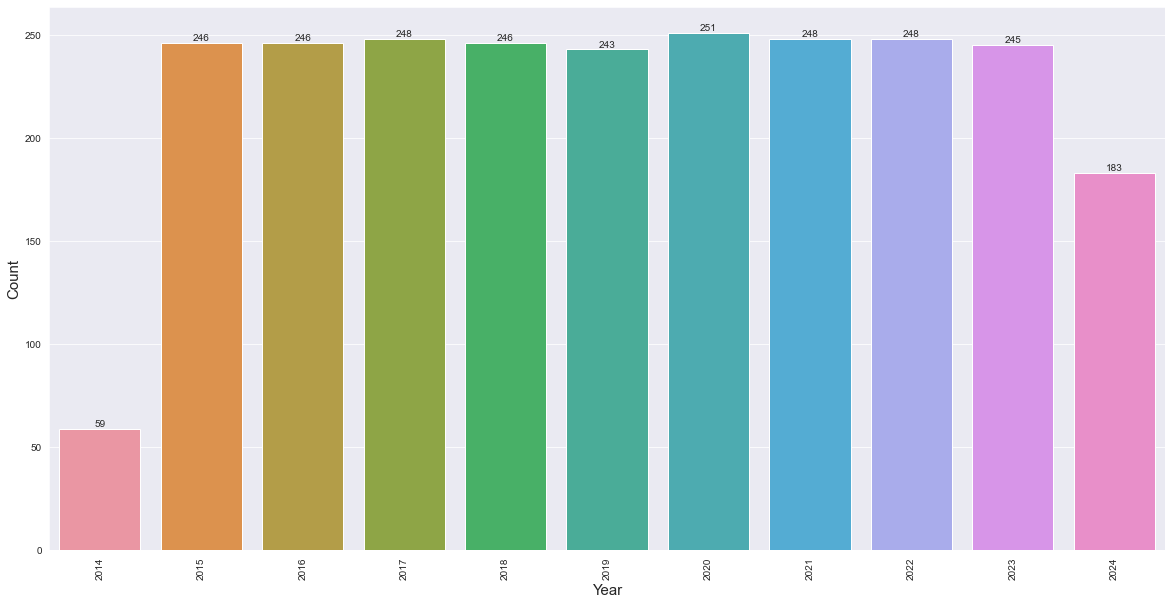

In [24]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
ax=sns.countplot(data=stock_data2, x=Year)
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Year", fontsize= 15)
plt.xticks(rotation=90)
plt.show()

In [25]:
# Identify the labels (index) of rows where the year is 2014
labels_to_drop = stock_data2[stock_data2['Date'].dt.year == 2014].index

# Drop the rows corresponding to 2014 using the labels
stock_data3 = stock_data2.drop(labels=labels_to_drop, axis=0)

In [26]:
stock_data.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2014-09-30 00:00:00+00:00,ADANIPOWER.BO,43,43,45,43,44,848909
1,2014-09-30 00:00:00+00:00,APOLLOHOSP.BO,1082,1121,1134,1090,1092,14555
2,2014-09-30 00:00:00+00:00,BHARTIARTL.NS,347,365,369,361,363,4148252
3,2014-09-30 00:00:00+00:00,HDFCBANK.BO,388,436,440,431,432,986976
4,2014-09-30 00:00:00+00:00,HEROMOTOCO.BO,2133,2842,2920,2825,2865,48106


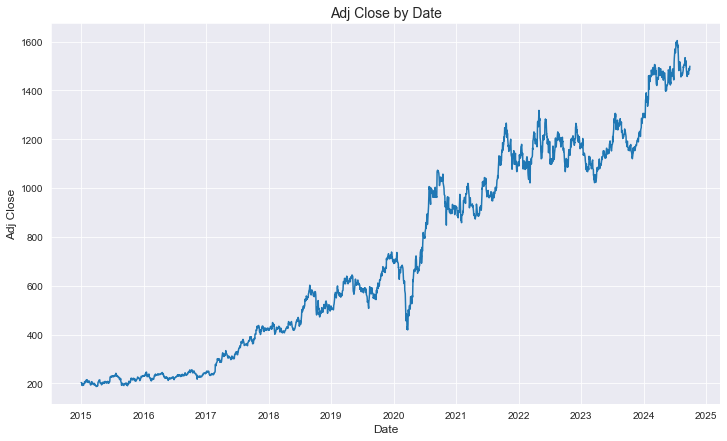

In [27]:
# Plotting the target-date linear graph
plt.figure(figsize=(12, 7))
sns.lineplot(data=stock_data3, x="Date", y="Adj Close")
plt.title("Adj Close by Date", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Adj Close", fontsize=12)
plt.grid(True)
plt.show()

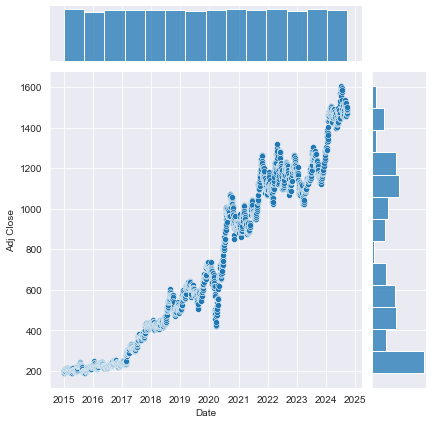

In [28]:
# Target-Date
sns.jointplot(data=stock_data3, x="Date", y="Adj Close")
sns.set_style('darkgrid')
plt.ylabel("Adj Close", fontsize=11)
plt.xlabel("Date", fontsize=11)
plt.show()

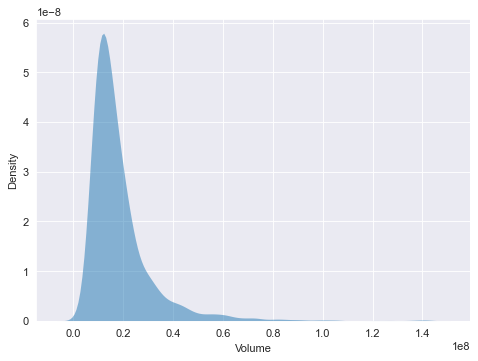

In [29]:
# The data distribution in "Volume"
plt.figure(figsize=(7,5), dpi=80)
sns.kdeplot(data=stock_data3, x="Volume", fill=True, common_norm=False,
            palette="crest", alpha=.5, linewidth=0)
plt.show()

In [30]:
# Assessing the 0 values of the "Volume" column
len(stock_data3[stock_data3["Volume"]==0])

0

In [31]:
# Plotting count plot by year
Year1 = stock_data['Date'].dt.year

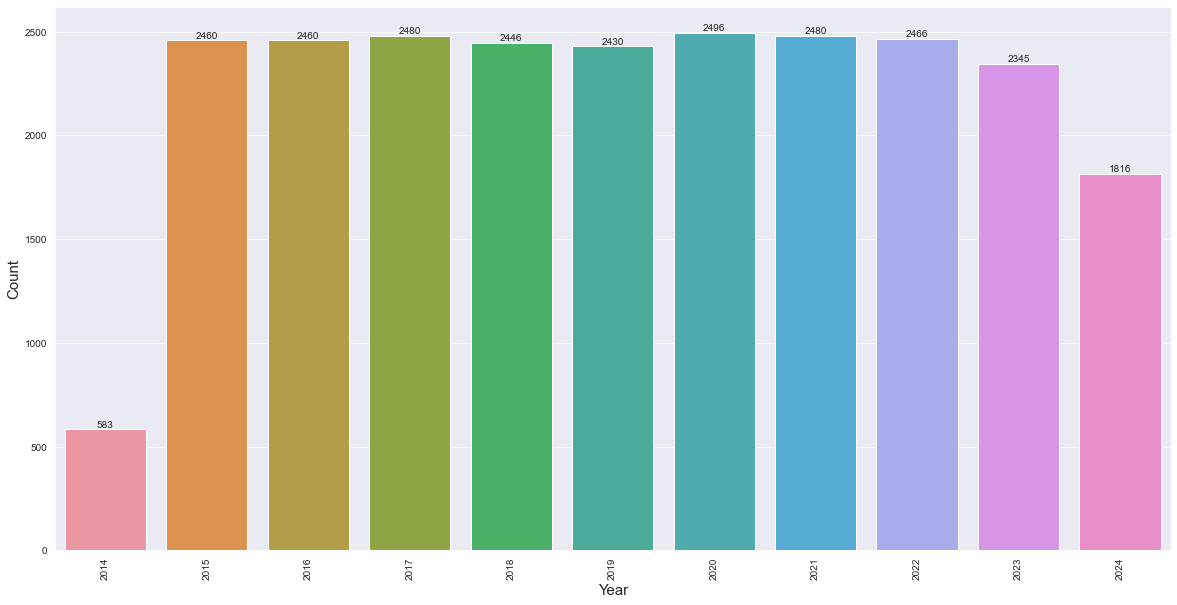

In [32]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
ax=sns.countplot(data=stock_data, x=Year1)
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Year", fontsize= 15)
plt.xticks(rotation=90)
plt.show()

In [33]:
# Identify the labels (index) of rows where the year is 2014
labels_to_drop = stock_data[stock_data['Date'].dt.year == 2014].index

# Drop the rows corresponding to 2014 using the labels
stock_data = stock_data.drop(labels=labels_to_drop, axis=0)

In [34]:
# Plotting count plot by year
Year1 = stock_data['Date'].dt.year

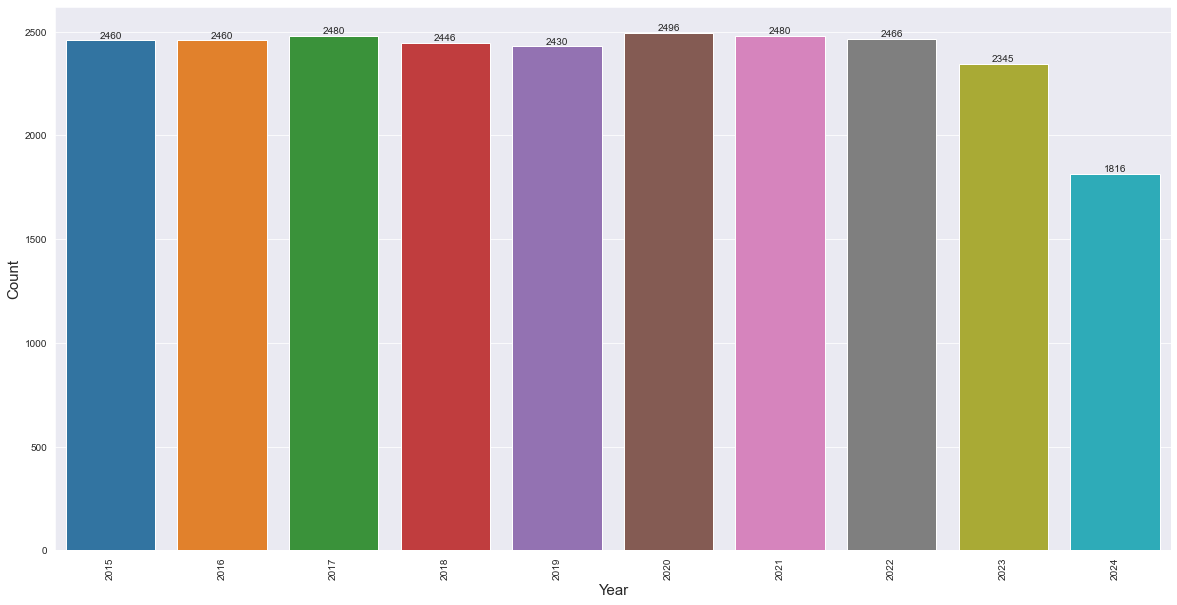

In [35]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
ax=sns.countplot(data=stock_data, x=Year1)
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Year", fontsize= 15)
plt.xticks(rotation=90)
plt.show()

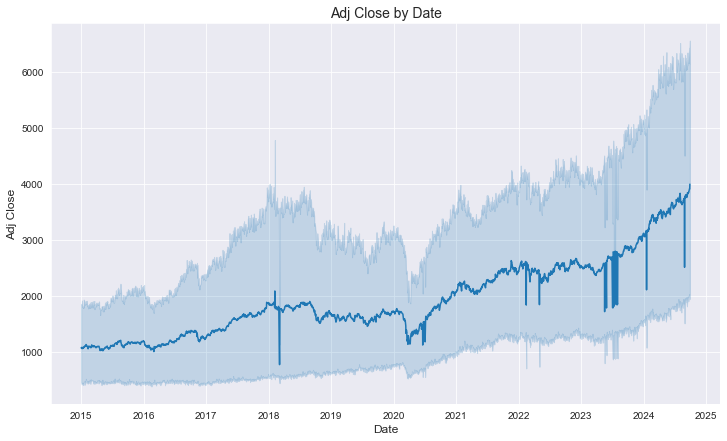

In [36]:
# Plotting the target-date linear graph
plt.figure(figsize=(12, 7))
sns.lineplot(data=stock_data, x="Date", y="Adj Close")
plt.title("Adj Close by Date", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Adj Close", fontsize=12)
plt.grid(True)
plt.show()

In [37]:
for i in stock_data.columns.drop(['Ticker','Date']):
    print("The min value of ",i," is ",stock_data[i].min())

The min value of  Open  is  15
The min value of  High  is  15
The min value of  Low  is  16
The min value of  Close  is  15
The min value of  Adj Close  is  16
The min value of  Volume  is  964


In [38]:
column=stock_data['Ticker']
column
# Check for problematic values in the 'Close' column
print(stock_data['Close'].value_counts())

30       117
27        91
29        86
28        80
36        65
        ... 
9109       1
3896       1
4020       1
5618       1
13275      1
Name: Close, Length: 5815, dtype: Int64


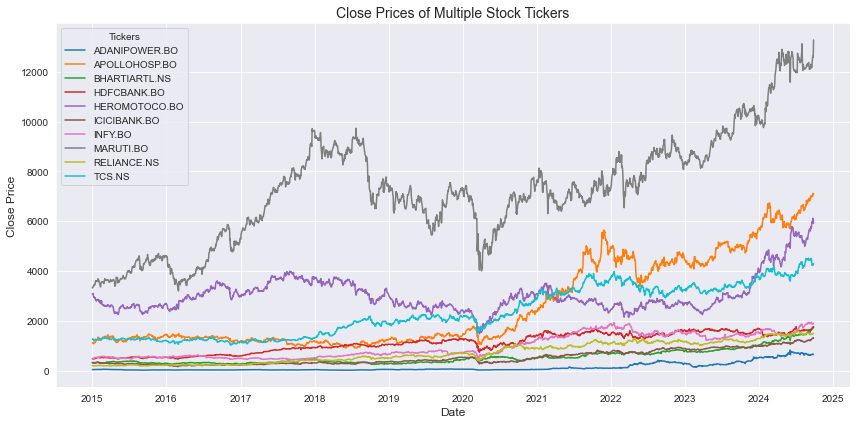

In [39]:
# Pivot data for plotting
pivot_df = stock_data.pivot(index='Date', columns='Ticker', values='Close')
# Convert the Int datatype to Float datatype
pivot_df = pivot_df.astype(float)
# Fill NaN values in pivot_df with an appropriate method
pivot_df = pivot_df.ffill()  # Forward fill
# OR
pivot_df = pivot_df.fillna(0)  # Replace NaN with 0 (if valid)
# Plotting
plt.figure(figsize=(12, 6))
for ticker in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[ticker], label=ticker)

plt.title('Close Prices of Multiple Stock Tickers', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(title='Tickers', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
import numpy as np
# Replace close prices in the range 0-100 with NaN
col=stock_data.columns.drop(['Ticker','Date'])
for val in col:
    stock_data.loc[(stock_data[val] > 0) & (stock_data[val] <= 100), val] = np.nan

In [41]:
columns_no_varience = []
for col in stock_data.columns:
    if len(stock_data[col].unique()) ==1:
        columns_no_varience.append(col)
        stock_data.drop([col], axis = 1, inplace = True)
print(columns_no_varience)
print (stock_data.shape)

[]
(23879, 8)


In [42]:
duplicate_rows = stock_data.duplicated()
print(duplicate_rows.any())
stock_data.drop_duplicates(inplace = True)
print(stock_data.shape)

False
(23879, 8)


In [43]:
## Checking For Duplicated Rows in Data
stock_data.duplicated().sum()

0

In [44]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    print('Skewness of', column, 'before outlier treatment: ', stock_data[column].skew())

Skewness of Open before outlier treatment:  2.105445655846787
Skewness of High before outlier treatment:  1.9993607242455373
Skewness of Close before outlier treatment:  2.001427845713017
Skewness of Low before outlier treatment:  1.995548729229545
Skewness of Adj Close before outlier treatment:  1.9989379582533018


In [45]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    print('Maximum value in', column, 'before outlier treatment: ', stock_data[column].max())

Maximum value in Open before outlier treatment:  13497
Maximum value in High before outlier treatment:  13497
Maximum value in Close before outlier treatment:  13275
Maximum value in Low before outlier treatment:  13675
Maximum value in Adj Close before outlier treatment:  13410


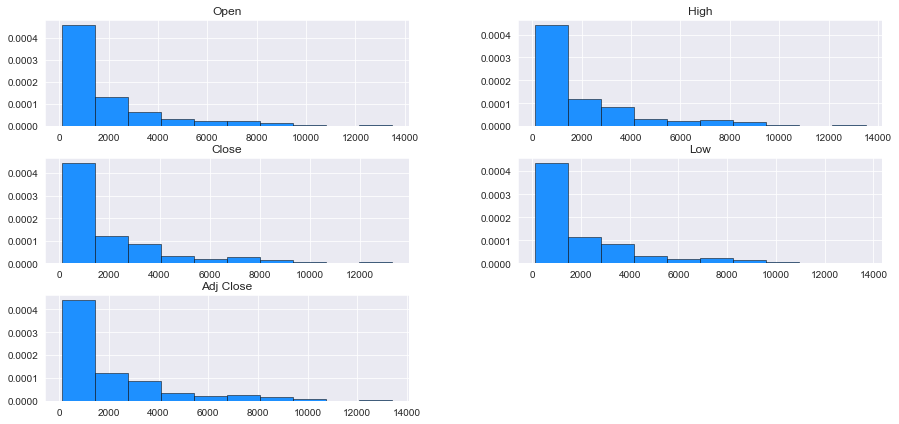

In [46]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].hist (figsize = (15,7),
       color = 'dodgerblue', density = True, edgecolor = 'black', linewidth = 0.5 )
plt.show()

In [47]:
stock_data.isnull().sum()

Date            0
Ticker          0
Open         1634
High         1634
Low          1607
Close        1657
Adj Close    1628
Volume          0
dtype: int64

In [48]:
print('Percentage of Missing values:')
print('-----------------------------')
stock_data.isnull().sum()/len(stock_data)*100

Percentage of Missing values:
-----------------------------


Date         0.000000
Ticker       0.000000
Open         6.842833
High         6.842833
Low          6.729763
Close        6.939152
Adj Close    6.817706
Volume       0.000000
dtype: float64

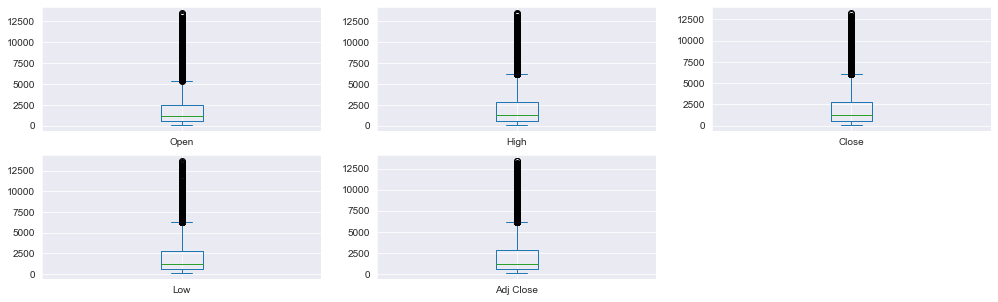

In [49]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].plot(kind = 'box',
                                                                        subplots = True, layout = (2,3), figsize = (17,5))
plt.show()

In [50]:
stock_data_numerical_columns = ['Open', 'High', 'Close', 'Low', 'Adj Close']
for column in stock_data_numerical_columns:
    Q1 = stock_data[column].quantile(0.25)
    Q3 = stock_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Drop NaN values before comparison
    column_data = stock_data[column].dropna()
    outliers = [x for x in column_data if x < lower or x > upper]

    print(column)
    print('Identified outliers: %d' % len(outliers))
    print('*' * 40)

Open
Identified outliers: 2098
****************************************
High
Identified outliers: 1821
****************************************
Close
Identified outliers: 1819
****************************************
Low
Identified outliers: 1811
****************************************
Adj Close
Identified outliers: 1814
****************************************


In [51]:
stock_data['Open'].isna().sum()

1634

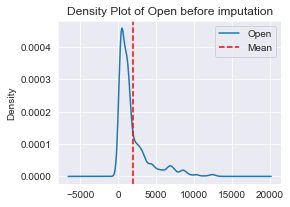

In [52]:
stock_data['Open'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Open before imputation')
plt.axvline(x=stock_data['Open'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [53]:
Skewness_of_Open_with_missing_values = stock_data['Open'].skew()

In [54]:
stock_data['Open']=stock_data.groupby(['Date'], group_keys=False)[col].apply(lambda x:x.fillna(x.median()))
stock_data['Open'].isna().sum()

0

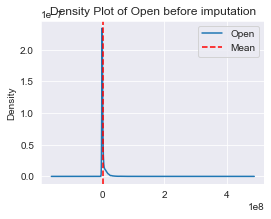

In [55]:
stock_data['Open'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Open before imputation')
plt.axvline(x=stock_data['Open'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [56]:
stock_data['Close'].isna().sum()

1657

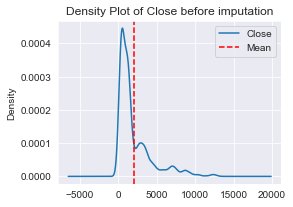

In [57]:
stock_data['Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Close before imputation')
plt.axvline(x=stock_data['Close'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [58]:
stock_data['Close']=stock_data.groupby(['Date'], group_keys=False)[col].apply(lambda x:x.fillna(x.median()))
stock_data['Close'].isna().sum()

0

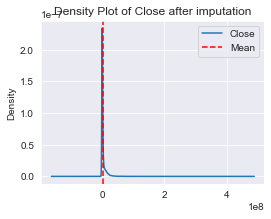

In [59]:
stock_data['Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Close after imputation')
plt.axvline(x=stock_data['Close'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [60]:
stock_data['Low'].isna().sum()

1607

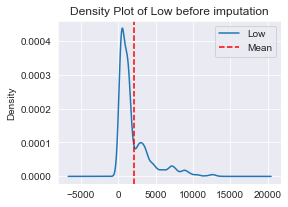

In [61]:
stock_data['Low'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Low before imputation')
plt.axvline(x=stock_data['Low'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [62]:
stock_data['Low']=stock_data.groupby(['Date'], group_keys=False)[col].apply(lambda x:x.fillna(x.median()))
stock_data['Low'].isna().sum()

0

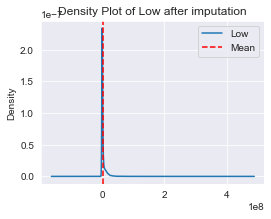

In [63]:
stock_data['Low'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Low after imputation')
plt.axvline(x=stock_data['Low'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [64]:
stock_data['High'].isna().sum()

1634

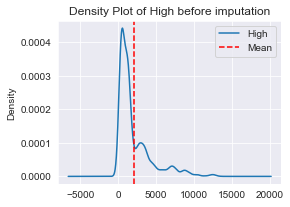

In [65]:
stock_data['High'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of High before imputation')
plt.axvline(x=stock_data['High'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [66]:
stock_data['High']=stock_data.groupby(['Date'], group_keys=False)[col].apply(lambda x:x.fillna(x.median()))
stock_data['High'].isna().sum()

0

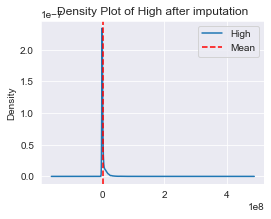

In [67]:
stock_data['High'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of High after imputation')
plt.axvline(x=stock_data['High'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [68]:
stock_data['Adj Close'].isna().sum()

1628

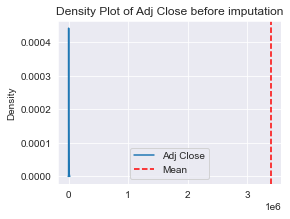

In [69]:
stock_data['Adj Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Adj Close before imputation')
plt.axvline(x=stock_data['High'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [70]:
stock_data['Adj Close']=stock_data.groupby(['Date'], group_keys=False)[col].apply(lambda x:x.fillna(x.median()))
stock_data['Adj Close'].isna().sum()

0

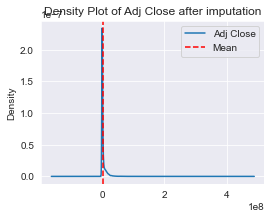

In [71]:
stock_data['Adj Close'].plot(kind='density', figsize = (4, 3))
plt.title('Density Plot of Adj Close after imputation')
plt.axvline(x=stock_data['Adj Close'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

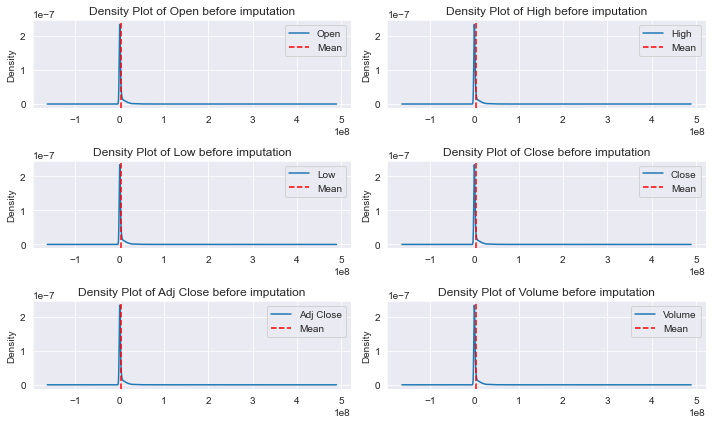

In [72]:
# Exclude unwanted columns
col = stock_data.columns.drop(['Ticker', 'Date'])

# Number of plots per row
plots_per_row = 2

# Initialize subplots
fig, axes = plt.subplots(nrows=(len(col) + 1) // plots_per_row, ncols=plots_per_row, figsize=(10, 6))
axes = axes.flatten()  # Flatten axes array for easy iteration

for idx, i in enumerate(col):
    stock_data[i].plot(kind='density', ax=axes[idx], figsize=(10, 6))
    axes[idx].set_title(f'Density Plot of {i} before imputation')
    axes[idx].axvline(x=stock_data[i].mean(), color='red', linestyle='--', label='Mean')
    axes[idx].legend()

# Hide unused axes (if any)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


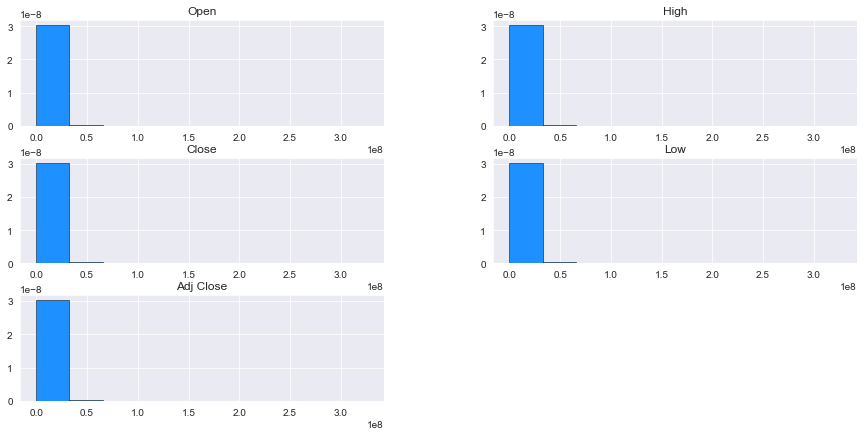

In [73]:
stock_data[['Open', 'High', 'Close', 'Low', 'Adj Close']].hist (figsize = (15,7),
       color = 'dodgerblue', density = True, edgecolor = 'black', linewidth = 0.5 )
plt.show()

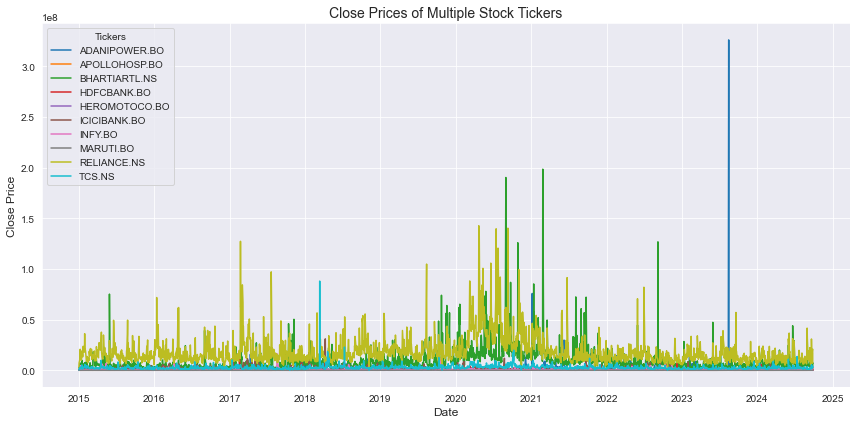

In [74]:
# Pivot data for plotting
pivot_df1 = stock_data.pivot(index='Date', columns='Ticker', values='Close')
pivot_df1 = pivot_df1.astype(float)
# Fill NaN values in pivot_df with an appropriate method
pivot_df1 = pivot_df1.ffill()  # Forward fill
# OR
pivot_df1 = pivot_df1.fillna(0)  # Replace NaN with 0 (if valid)
# Plotting
plt.figure(figsize=(12, 6))
for ticker in pivot_df1.columns:
    plt.plot(pivot_df1.index, pivot_df1[ticker], label=ticker)

plt.title('Close Prices of Multiple Stock Tickers', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(title='Tickers', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
stock_data.loc[(stock_data['Ticker'] == 'ADANIPOWER.BO') , 'Ticker'] = np.nan


In [76]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

,Missing Values
Date,0
Ticker,2380
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [77]:
stock_data = stock_data.dropna(subset=['Ticker'])

In [78]:
missing_values = pd.DataFrame(stock_data.isnull().sum(), columns=['Missing Values'])
missing_values

,Missing Values
Date,0
Ticker,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [79]:
stock_data['Ticker'].value_counts()

BHARTIARTL.NS    2404
RELIANCE.NS      2404
TCS.NS           2404
HDFCBANK.BO      2383
INFY.BO          2383
MARUTI.BO        2381
APOLLOHOSP.BO    2380
HEROMOTOCO.BO    2380
ICICIBANK.BO     2380
Name: Ticker, dtype: int64

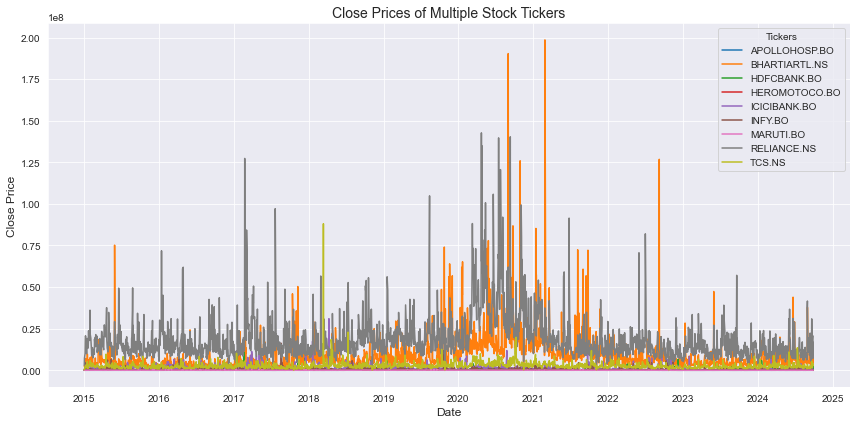

In [80]:
# Pivot data for plotting
pivot_df2 = stock_data.pivot(index='Date', columns='Ticker', values='Close')
# Ensure pivot_df has no NaN values
pivot_df2 = pivot_df2.fillna(method='ffill')  # Forward fill
# OR
# pivot_df = pivot_df.fillna(0)  # Replace NaN with 0

# Ensure data type is float
pivot_df2 = pivot_df2.astype(float)

# Plotting
plt.figure(figsize=(12, 6))
for ticker in pivot_df2.columns:
    plt.plot(pivot_df2.index, pivot_df2[ticker], label=ticker)

plt.title('Close Prices of Multiple Stock Tickers', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(title='Tickers', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [81]:
column=stock_data['Ticker'].value_counts()
column

BHARTIARTL.NS    2404
RELIANCE.NS      2404
TCS.NS           2404
HDFCBANK.BO      2383
INFY.BO          2383
MARUTI.BO        2381
APOLLOHOSP.BO    2380
HEROMOTOCO.BO    2380
ICICIBANK.BO     2380
Name: Ticker, dtype: int64